Optimal number of clusters for KMeans: 9


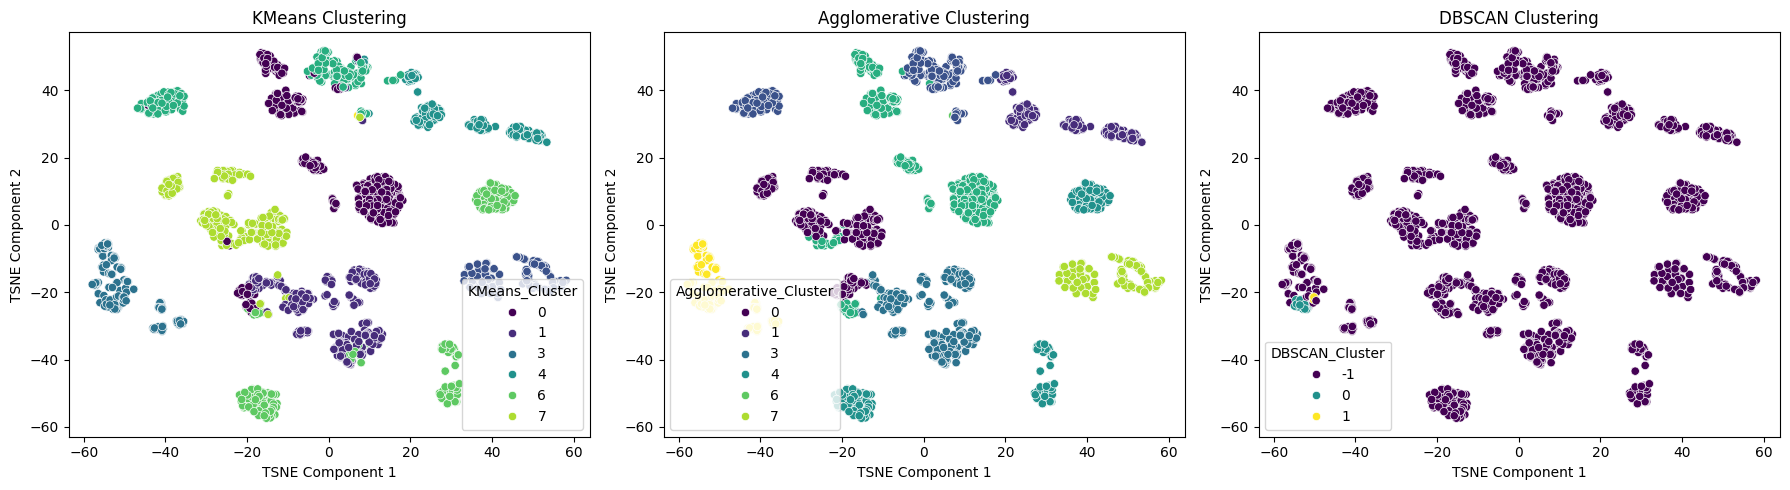

Silhouette Score for KMeans Clustering: 0.22142910925066597
Silhouette Score for Agglomerative Clustering: 0.21237039702468388
Silhouette Score for DBSCAN Clustering: -0.06775812425895852


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load dataset
crop_data = pd.read_csv('crop_data.csv')

# Data Preprocessing Techniques
# Handling missing values for numeric columns
numeric_columns = crop_data.select_dtypes(include=['float64', 'int64']).columns
crop_data[numeric_columns] = crop_data[numeric_columns].fillna(crop_data[numeric_columns].mean())

# Handling missing values for non-numeric columns
non_numeric_columns = crop_data.select_dtypes(exclude=['float64', 'int64']).columns
crop_data[non_numeric_columns] = crop_data[non_numeric_columns].fillna(crop_data[non_numeric_columns].mode().iloc[0])

# Feature scaling for numeric columns
numeric_scaler = StandardScaler()
scaled_numeric_features = numeric_scaler.fit_transform(crop_data[numeric_columns])

# One-hot encoding for non-numeric columns
non_numeric_encoder = OneHotEncoder(drop='first')
encoded_non_numeric_features = non_numeric_encoder.fit_transform(crop_data[non_numeric_columns])

# Get the column names after one-hot encoding
encoded_feature_names = non_numeric_encoder.get_feature_names_out()

# Combine numeric and encoded non-numeric features
scaled_features = pd.concat([pd.DataFrame(scaled_numeric_features, columns=numeric_columns),
                             pd.DataFrame(encoded_non_numeric_features.toarray(), columns=encoded_feature_names)],
                            axis=1)

# Dimensionality Reduction using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_features = tsne.fit_transform(scaled_features)

# Clustering Algorithms
# KMeans Clustering with hyperparameter tuning
kmeans_scores = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
    kmeans_scores.append(silhouette_avg)

optimal_n_clusters = kmeans_scores.index(max(kmeans_scores)) + 2  # Add 2 because range starts from 2
print("Optimal number of clusters for KMeans:", optimal_n_clusters)

kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(scaled_features)
crop_data['KMeans_Cluster'] = kmeans.labels_

# Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=optimal_n_clusters)
agglomerative.fit(scaled_features)
crop_data['Agglomerative_Cluster'] = agglomerative.labels_

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(scaled_features)
crop_data['DBSCAN_Cluster'] = dbscan.labels_

# Visualizing results
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=tsne_features[:,0], y=tsne_features[:,1], hue=crop_data['KMeans_Cluster'], palette='viridis')
plt.title('KMeans Clustering')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')

plt.subplot(1, 3, 2)
sns.scatterplot(x=tsne_features[:,0], y=tsne_features[:,1], hue=crop_data['Agglomerative_Cluster'], palette='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')

plt.subplot(1, 3, 3)
sns.scatterplot(x=tsne_features[:,0], y=tsne_features[:,1], hue=crop_data['DBSCAN_Cluster'], palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')

plt.tight_layout()
plt.show()

# Evaluate clustering performance using silhouette score
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_)
agglomerative_silhouette = silhouette_score(scaled_features, agglomerative.labels_)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_)

print("Silhouette Score for KMeans Clustering:", kmeans_silhouette)
print("Silhouette Score for Agglomerative Clustering:", agglomerative_silhouette)
print("Silhouette Score for DBSCAN Clustering:", dbscan_silhouette)
